In [192]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
from bs4 import BeautifulSoups
import re
import nltk
import en_core_web_sm
import random
from nltk.corpus import stopwords
stopwords = set(STOPWORDS)
color = sns.color_palette()
%matplotlib inline

# Amazon Fine Food Reviews
This dataset, consisting of reviews of Fine Foods from Amazon, spans a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. 

Since the goal of this project is to explore Word Cloud visualizations, analysis will be very specfic to words used in reviews. 

Column descriptions - 
- ProductId: Unique identifier for the product
- UserId: Unqiue identifier for the user
- ProfileName: Profile name of the user
- HelpfulnessNumerator: Number of users who found the review helpful
- HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not
- Score: Rating between 1 and 5
- Time: Timestamp for the review
- Summary: Brief summary of the review
- Text: Text of the review

# Reading File

In [9]:
reviews = pd.read_csv("Reviews.csv", encoding='utf8', low_memory = False)

In [365]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,unhelpful
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0


# Stop Words and Function Definitions 

In [ ]:
noise_set = ["a", "is", "the", "as", "was", "i", "me", "we", "our",
              "it", "am", "are", "were", "be", "to", "-PRON-", "and",
            "much", "will"]

stop_words = list(stopwords) + list(noise_set)

#Simple function to clean strings 
def to_words(review):  
    no_html = BeautifulSoup(review).get_text()
    no_punctuation = re.sub("[^a-zA-Z0-9]", " ", no_html) 
    string_words = no_punctuation.lower().split()  
#    root_words = [get_root(word)[0] for word in string_words]
#Takes too much time and produces negligble changes in results (specific to this case)
    return(' '.join(string_words))

path = 'masks-wordclouds/'

# Primary Visualization of words used in reviews

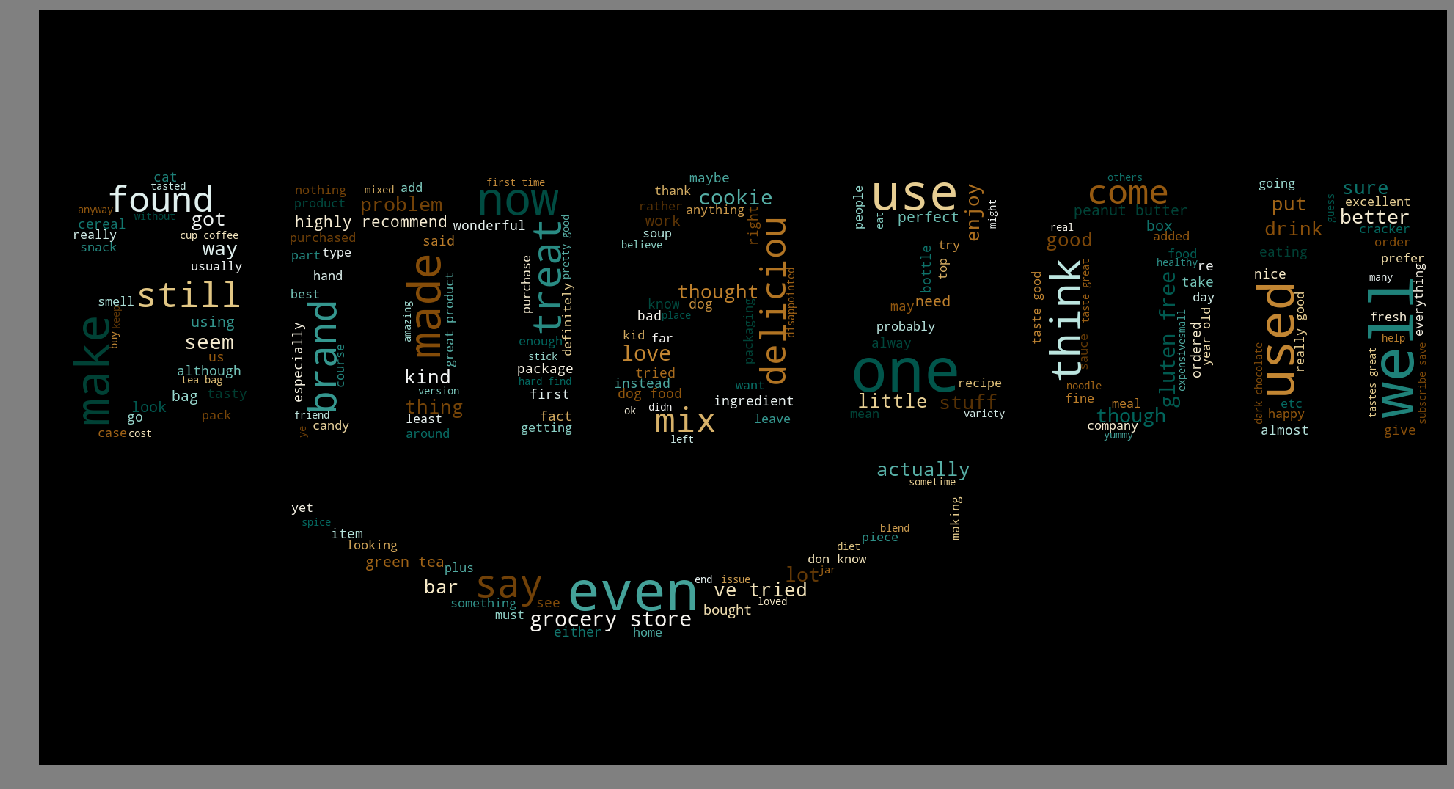

In [255]:
data = random.sample(set(reviews['Text']), 200000)
words = ' '.join([to_words(i) for i in data])

mask = np.array(Image.open(path + 'amazon1.png'))
word_cloud = WordCloud(width = 1000, height = 512, background_color='black', colormap="BrBG_r",
                       mask=mask, stopwords = stop_words, relative_scaling = 1).generate(words)
plt.figure(figsize=(20,15),facecolor = 'grey', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

As expected, most of the words used are specific to the food category.  The words lean more towards utility like "used", "make", "found", "tried", "made", than towards actual review keywords like "taste", "flavor", and more. Thus, exploring specfic areas might help us gain a better understanding:
1. Most Helpful (upvoted) reviews
2. Most Unhelpful (downvoted) reviews
3. 5-Star Rated reviews
4. 1-Star Rated reviews
5. Reviews of Most Reviewed Products

# Most Helpful Reviews (Text and Summary)

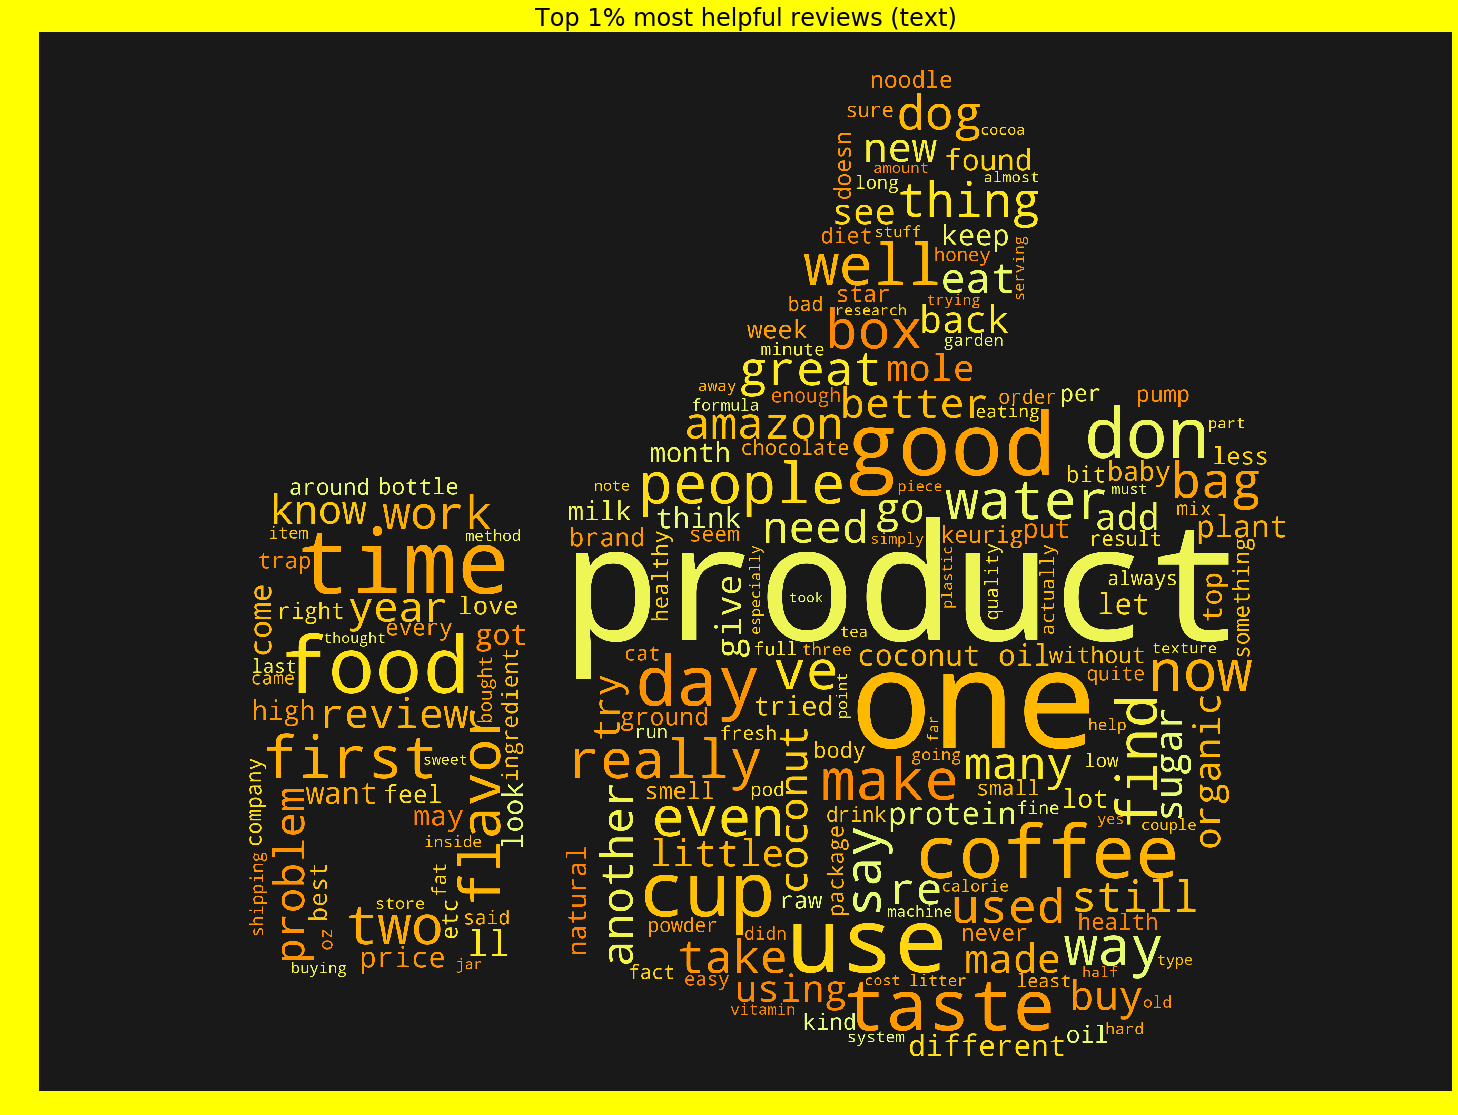

In [359]:
# ulimit = np.percentile(reviews.HelpfulnessNumerator.values, 99)
helpful_text = reviews[reviews['HelpfulnessNumerator'] > ulimit]['Text'].unique()
words = ' '.join([to_words(i) for i in helpful_text])

mask = np.array(Image.open(path + 'upvote.png'))
word_cloud = WordCloud(width = 1000, height = 512, background_color='#191919', colormap="Wistia",
                       mask=mask, stopwords = stop_words, relative_scaling = 1).generate(words)
plt.figure(figsize=(20,15),facecolor = 'yellow', edgecolor='orange')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Top 1% most helpful reviews (text)", fontsize = 24)
plt.show()

While there are a few meaningful keywords like "time", "food", "use", "taste", a lot of meaningless words like "one", "need", "seem" exist throughout the plot. This might be a consequence of visualizing the text column from Reviews which contains long paragraphs of the user's thoughts. Thus, rather than using the "Text" column to make inferences, I am going to use the "Summary" column (which is a short description that a user provides) in the following visualizations. 

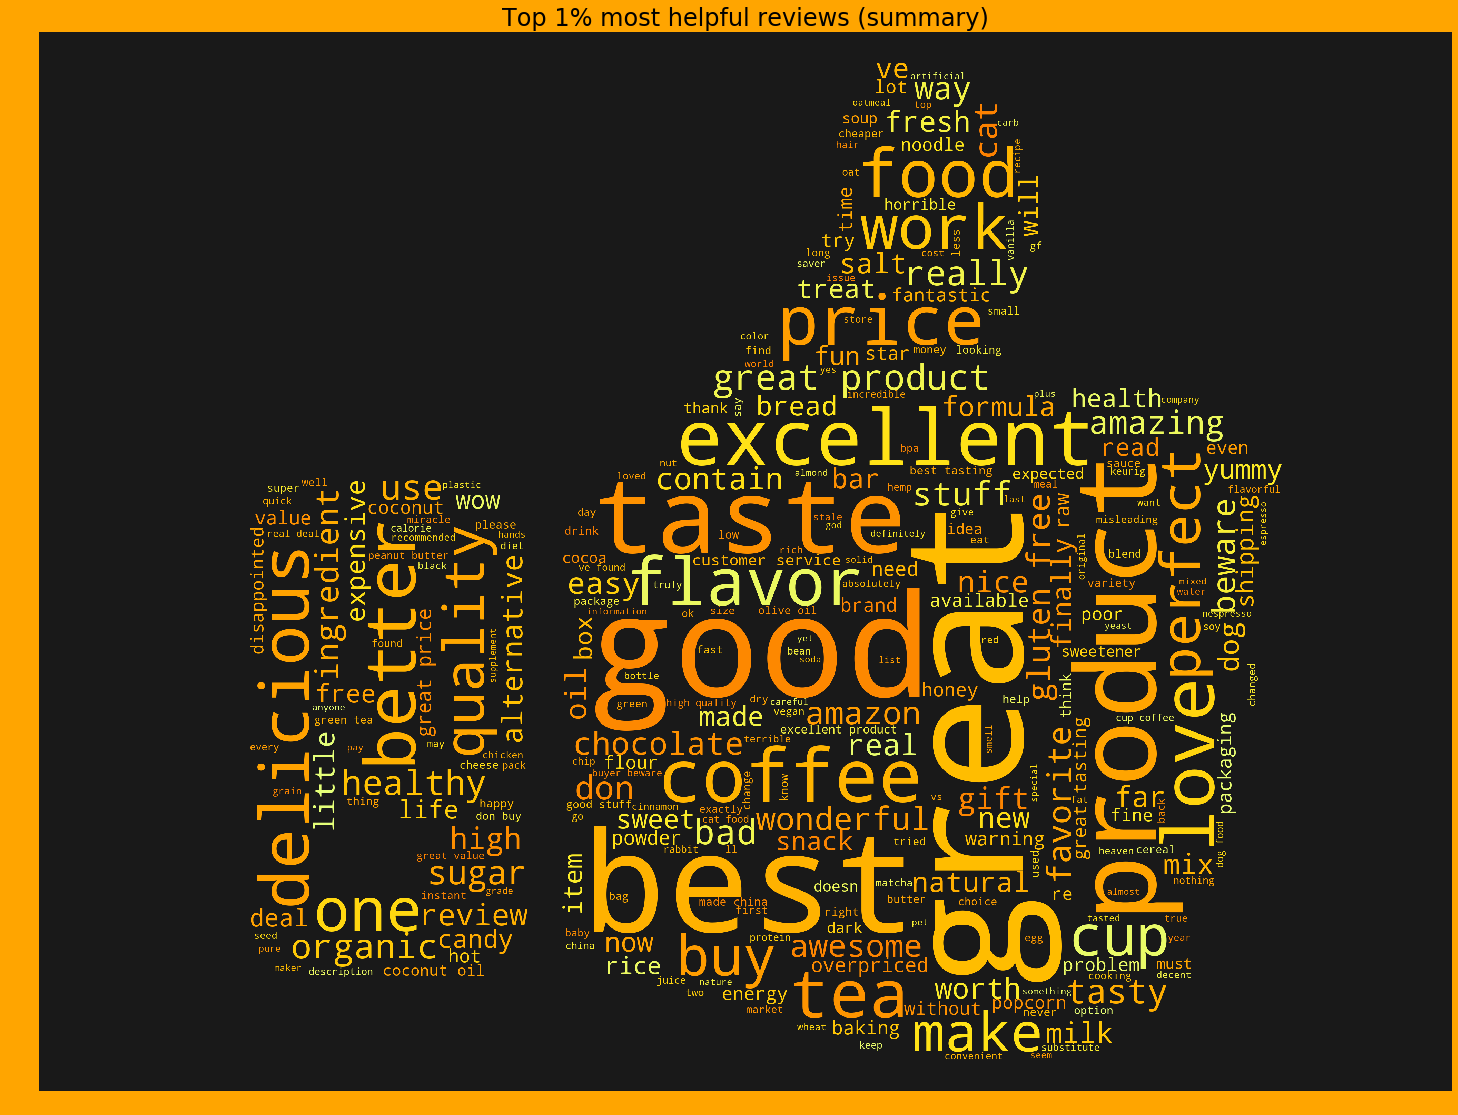

In [159]:
ulimit = np.percentile(reviews.HelpfulnessNumerator.values, 99)
helpful_summary = reviews[reviews['HelpfulnessNumerator'] > ulimit]['Summary'].unique()
words = ' '.join([to_words(i) for i in helpful_summary])

mask = np.array(Image.open(path + 'upvote.png'))
word_cloud = WordCloud(width = 1000, height = 512, background_color='#191919', colormap="Wistia",
                       mask=mask, stopwords = stop_words, max_words = 300).generate(words)
plt.figure(figsize=(20,15),facecolor = 'orange', edgecolor='yellow')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Top 1% most helpful reviews (summary)", fontsize = 24)
plt.show()

This visualization provides much more insight into the words used in most helpful reviews. 

- Going by dominance of words like "great", "best", "excellent", "delicious", "love" and the very limited presence of words like "horrible", "overpriced", "beware", it is highly likely that positive reactions are upvoted the most. 

- Strong presence of words like "price", "taste", "product", "quality", "work", suggests that users tend to upvote the reviews that specifically address the qualitative aspects of a product.

- Thus, reviews that address the qualitative aspect of a product while carrying a positive emotion might possibly get larger upvotes than the rest.

# 5-Star Rated Reviews

In [197]:
score_5 = reviews[reviews['Score'] == 5]['Summary'].unique()
score_5 = ' '.join([to_words(i) for i in score_5])

Text(0.5, 1.0, '5-star rated reviews')

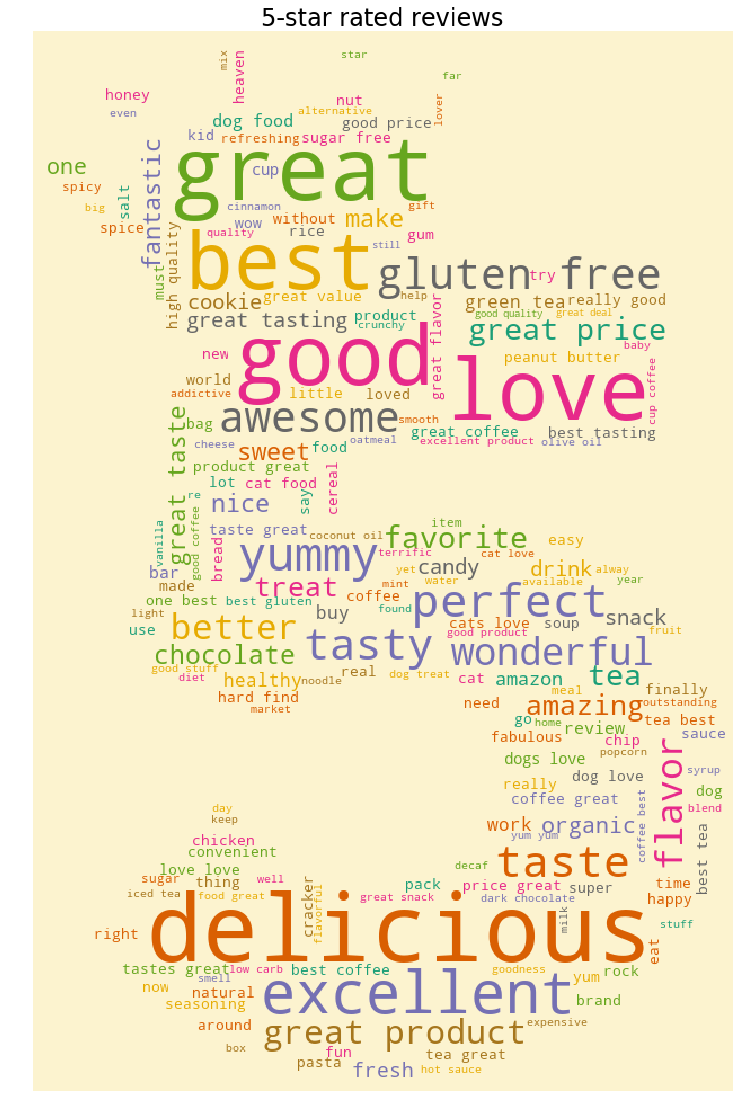

In [344]:
mask = np.array(Image.open(path +'5stars.png'))
word_cloud = WordCloud(width = 500, height = 200, background_color='#fcf3cf', colormap="Dark2",
                       mask=mask, stopwords = stop_words, relative_scaling = 1, max_words = 200).generate(score_5)
plt.figure(figsize=(10,15),facecolor = 'w', edgecolor='orange')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("5-star rated reviews", fontsize = 24)

As can be expected, users that rated a product 5-stars tend to use very strong positive words in their summaries like "delicious", "perfect", "love", "best". 

- "Taste" seems to be the primary driving factor behind a 5-star review
- "Price" and "Quality" tend to be the secondary factors (e.g., "price great", "great value", "great price", "great product")
- "Delivery" and "Time", suprisingly, do not carry a significant presence.

This suggests that if a user is satisfied with "Taste" and "Price", packaging and time taken to deliver tend to over overlooked upon. 


# 1-Star Rated Reviews

In [ ]:
score_1 = reviews[reviews['Score'] == 1]['Summary'].unique()
score_1 = ' '.join([to_words(i) for i in score_1])

Text(0.5, 1.0, '1-star rated reviews')

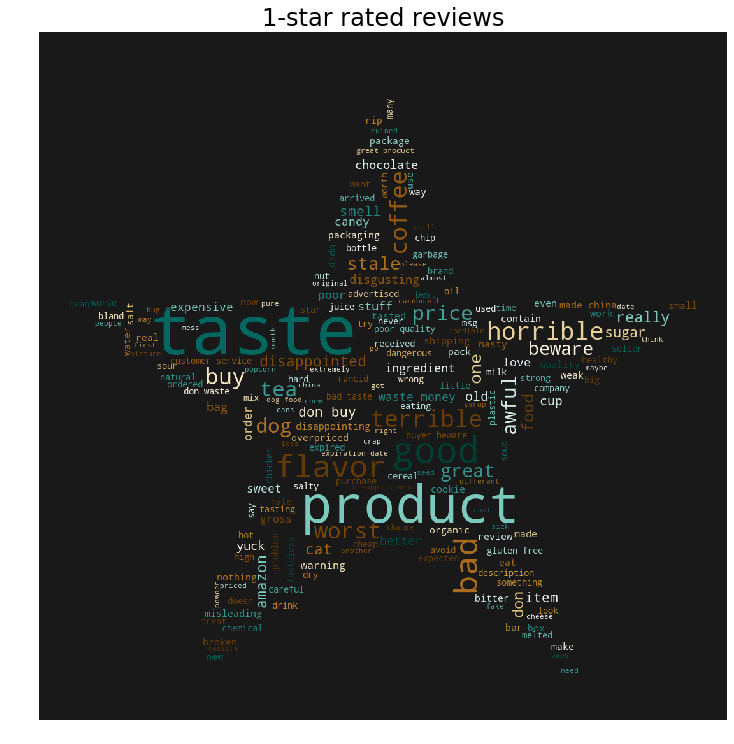

In [247]:
mask = np.array(Image.open(path + 'star.png'))
word_cloud = WordCloud(width = 500, height = 200, background_color='#191919', colormap="BrBG",
                       mask=mask, stopwords = stop_words, relative_scaling = 1, max_words = 200).generate(score_1)
plt.figure(figsize=(10,15),facecolor = 'w', edgecolor='orange')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("1-star rated reviews", fontsize = 24)


Similar to the 5-star rated reviews, the 1-star rated also carries a presence of strong words, though negative, like "terrible", "horrible", "awful". 

- "Taste" dominates the emotion here as well (e.g., "stale", "yuck", "gross", "bitter", "misleading")
- "Price" and "Quality" come next as well (e.g., "expensive", "overpriced", "product")
- "Delivery" has a considerable presence here. (e.g., "packaging", "shipping", "received")

This suggests that if the user is not satisfied with the "Taste" and "Price", all other aspects like "Delivery" and "Packaging" play an important role as well. 


# Most Reviewed Products

In [363]:
products = reviews['ProductId'].value_counts()
ulimit = np.percentile(products.values, 99)
top_products = list(products[products.values > ulimit].index)
summary_products = [reviews['Summary'][i] for i in range(0, len(reviews)) if reviews['ProductId'][i] in top_products]
words = ' '.join([to_words(i) for i in summary_products if type(i) == str])

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B007I7YYGY/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


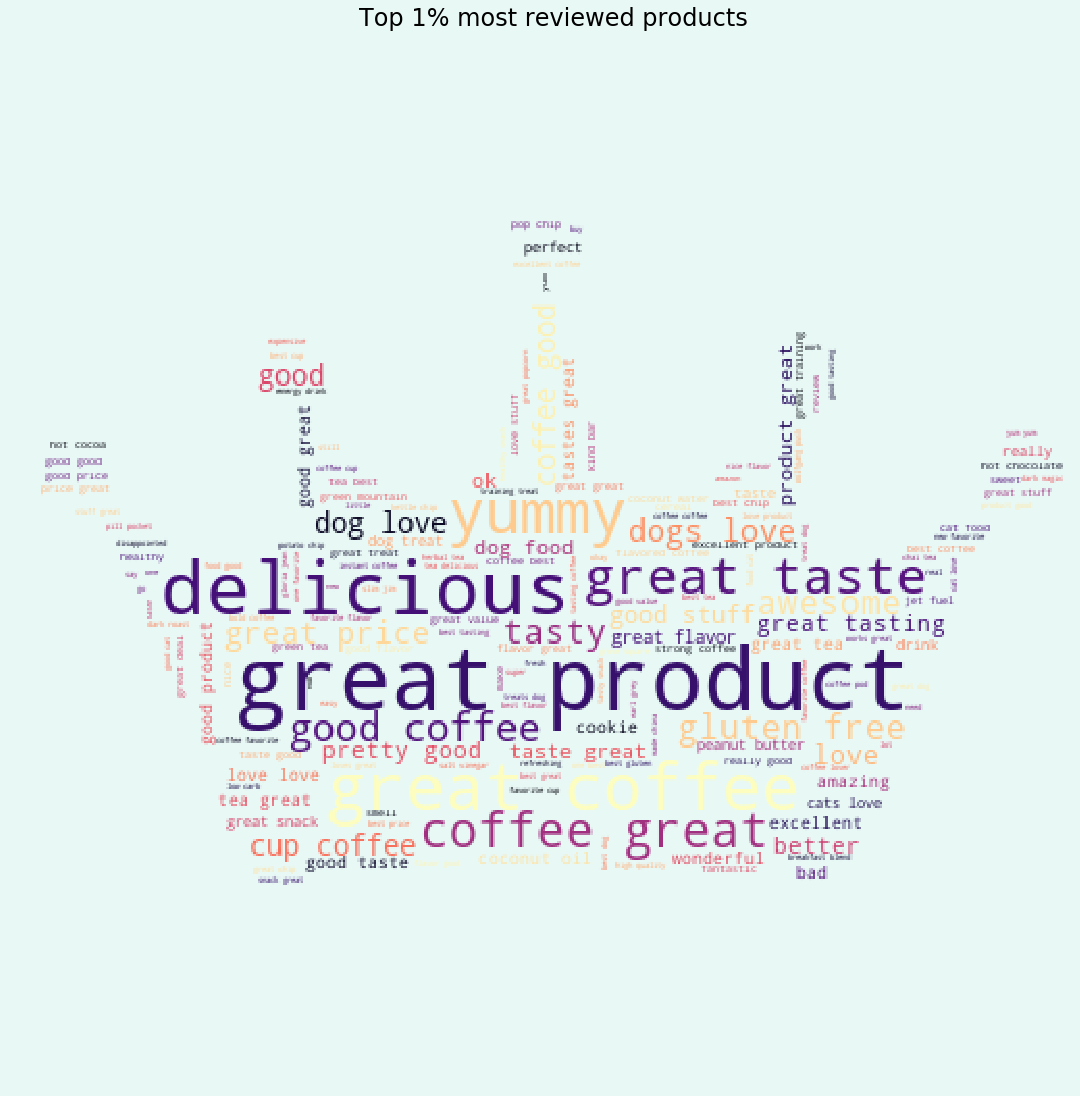

In [364]:
mask = np.array(Image.open(path + 'crown.png'))
word_cloud = WordCloud(width = 1000, height = 1000, background_color='#e8f8f5', colormap="magma",
                       mask=mask, stopwords = stop_words, relative_scaling = 1).generate(words)
plt.figure(figsize=(15,15),facecolor = '#e8f8f5', edgecolor='yellow')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.title("Top 1% most reviewed products", fontsize = 24)
plt.show()

Interestingly, the word cloud of most reviewed products only contain words that carry extreme emotions, to a larger extent. For example, "great", "love", "beware", "horrible" appear very frequently. While the extreme positive reaction can be raionalized since users tend to buy and review products carry a positive-reception, extreme negative reaction is a bit difficult to reason. It could possibly be attributed to highly popular products receiving a considerable bit of backlash but this has to be analyzed in detail.

# Most Downvoted Reviews

In [203]:
(reviews['HelpfulnessDenominator'] - reviews['HelpfulnessNumerator']).describe()

count    568454.000000
mean          0.484993
std           1.905591
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         140.000000
dtype: float64

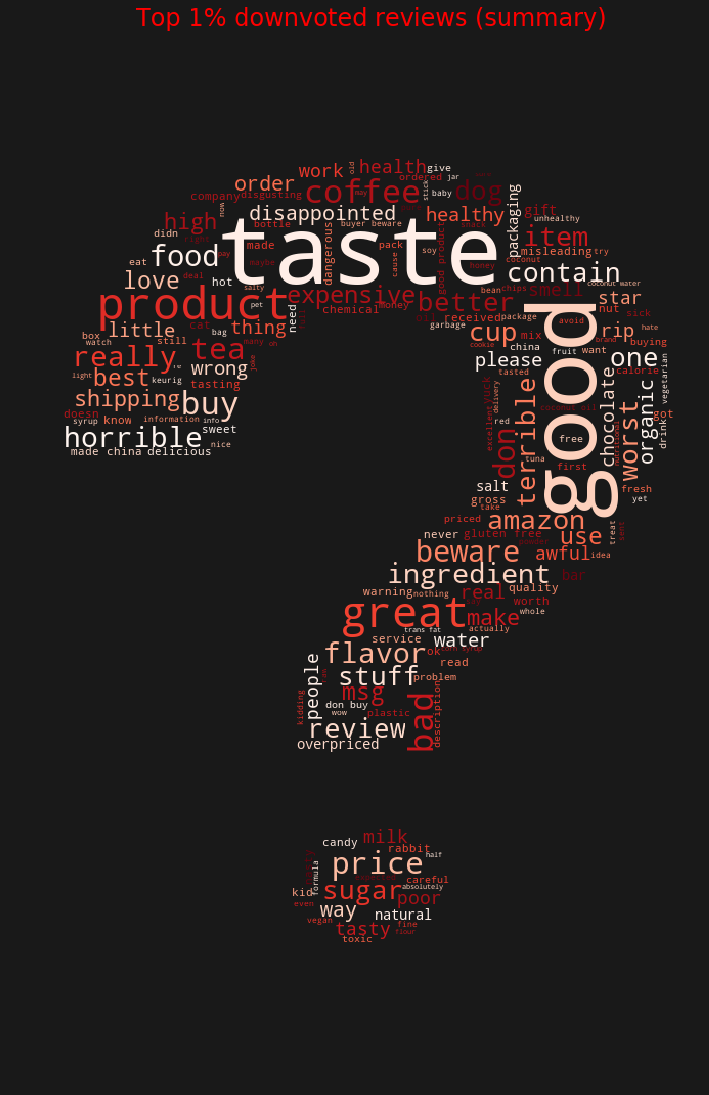

In [362]:
reviews['unhelpful'] = reviews['HelpfulnessDenominator'] - reviews['HelpfulnessNumerator']
ulimit = np.percentile(reviews['unhelpful'], 99)
unhelpful = reviews[reviews['unhelpful']> ulimit]['Summary'].unique()
words = ' '.join([to_words(i) for i in unhelpful if type(i) == str])

mask = np.array(Image.open(path + 'question1.png'))
word_cloud = WordCloud(width = 1000, height = 512, background_color='#191919', colormap="Reds",
                       mask=mask, stopwords = stop_words, relative_scaling = 0.5).generate(words)
plt.figure(figsize=(30,15),facecolor = '#191919', edgecolor='yellow')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.title("Top 1% downvoted reviews (summary)", fontsize = 24, color  = "Red")
plt.show()

Contrary to the prior belief that reviews that include qualitative aspects of a product tend to get higher upvotes, the most downvoted reviews also tend to include qualitative aspects of a product. The difference, however, is that reviews with negative emotion carry a much larger prominence here (along with the positive ones). Thus, while word clouds can be used to make inferences and prior assumptions, robust sentiment analysis MUST be carried out before making decisions. 

## Conclusion: 
Word clouds help in building prior beliefs and in gaining a clear understanding of text columns in a dataset but to arrive at a conclusion, further analysis must be carried out. 